# Question 1 Analysis 3

Problem - Find out top 25 discussed subjects in all the items.
Please Run the last block directly. Proceesed data is stored in a csv.

In [2]:
import email
import os
import operator 
import nltk
import csv

Collecting path variables. Please change the value of rpath according to your machine.

In [4]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
rpath="C:/Users/Ankit Mahajan/Documents/Python Scripts/"
path="midterm/data/enron/maildir"
root = rpath+path

Defining a function that filters out all the irrelevant words and punctuation marks.

In [5]:
def addtodictionary(raw_email):
    email_message = email.message_from_string(raw_email)
    for k in nltk.pos_tag(tokenizer.tokenize(str(email_message['Subject']).lower())):
        if k[0] in nltk.corpus.stopwords.words() or k[0].lower is "fw" or k[0].lower is "fwd":
            continue
        elif k[1] in ['NN','VB','VBD','VBG','VBN','VBZ','VBP','LS']:
            if k in datatoanalyse:
                datatoanalyse[k] +=1
            else:
                datatoanalyse[k] = 1

Iterating through all the emails for Subject

In [6]:
datatoanalyse = {}
for subdir, dirs, files in os.walk(root):
    for file in files:
        with open(subdir+"/"+file, 'r') as f:
            addtodictionary(f.read())

Sorting the values and preparing data for visualization

In [46]:
freq = sorted(datatoanalyse.items(), key=operator.itemgetter(1), reverse=True)
labels, values = zip(*freq)

Writting results to a csv file

In [49]:
with open("Analysis 3"+'.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Word','Frequency'])
    for r in freq:
        writer.writerow([r[0][0],r[1]])

Please run this code directly. Displaying bar graph of the data.

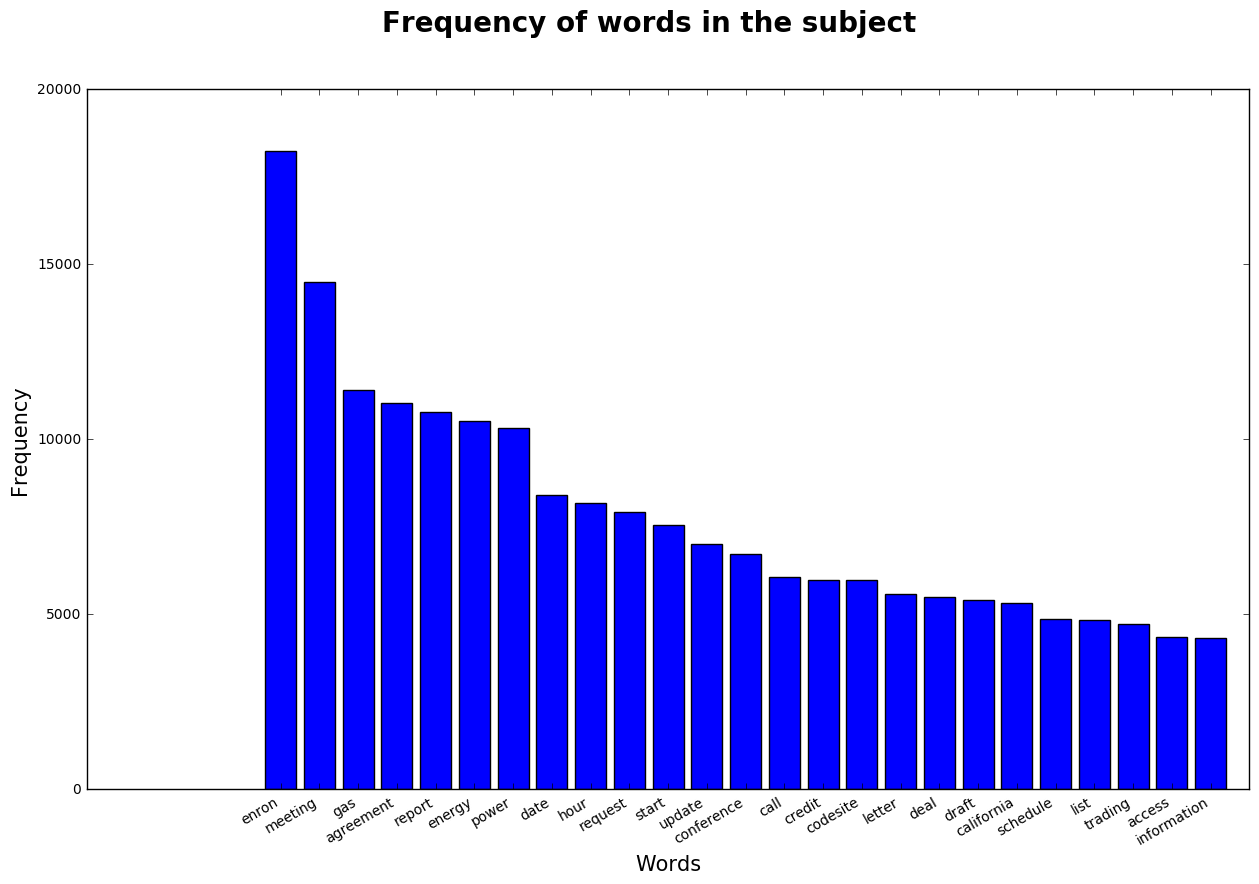

In [67]:
freq = {}
with open('Analysis 3.csv') as f:
    reader = csv.DictReader(f)
    i= 0
    for r in reader:
        if i == 25:break
        freq[r['Word']] = int(r['Frequency'])
        i+=1
freq = sorted(freq.items(), key=operator.itemgetter(1), reverse=True)
labels, values = zip(*freq)
plt.bar(range(len(freq)), values, align='center')
plt.xticks(range(len(freq)), labels)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.suptitle('Frequency of words in the subject' , fontsize=20, fontweight='bold')
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Words", fontsize=15)
fig.autofmt_xdate()
plt.show()